# Question 1: Classification: Feature Extraction + Classical Methods (40 points)

In [129]:
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math 
import itertools

# Modelling Algorithms :

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Modelling Helpers :
from sklearn.preprocessing import  Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

#preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder

#evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
# from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  

# # Deep Learning Libraries
# from keras.models import Sequential, load_model
# from keras.layers import Dense, Dropout, Flatten
# from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
# from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
# from keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
# from keras.utils import to_categorical

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns


# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)

In [130]:
# Reading the csv 
data = pd.read_csv('train.csv')
data_test = pd.read_csv('testX.csv')

In [131]:
data.head()

,Id,Label,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,10000,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10002,0,0,0,0,0,0,0,0,0,...,31,9,0,0,0,0,0,0,0,0
3,10003,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10004,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
# Dropping Id and Label columns from the train data

train_data = data.drop(['Id','Label'],axis=1)

In [133]:
train_data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,31,9,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
train_data.shape

(60000, 784)

In [135]:
data_test.head()

,Id,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
# Droping the Id column from test data

test_data = data_test.drop('Id',axis=1)

In [137]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
test_data.shape

(10000, 784)

In [139]:
#Checking for null values in test data
test_data.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
779    0
780    0
781    0
782    0
783    0
Length: 784, dtype: int64

In [140]:
#Checking for null values in train data
train_data.isnull().sum()

1      0
2      0
3      0
4      0
5      0
      ..
780    0
781    0
782    0
783    0
784    0
Length: 784, dtype: int64

In [141]:
# Finding the unique values of lables in the train dataset
data['Label'].unique()

array([4, 0, 1, 2, 3])

In [142]:
# Finding the unique values count of lables in the train dataset
data['Label'].value_counts()

4    12067
2    11994
1    11986
3    11978
0    11975
Name: Label, dtype: int64

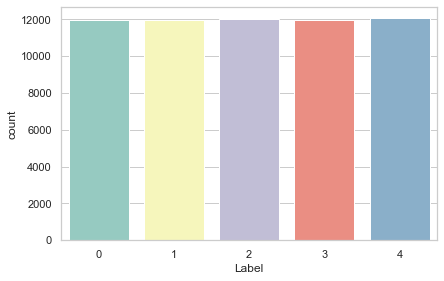

In [143]:
#plot between the count of the target values
sns.countplot(x="Label", data=data,  palette="Set3")
plt.show()

In [144]:
# Normalizing the data

train_data = train_data/255.0
test_data = test_data/255.0

In [145]:
# Reshaping the data

train_data_1=train_data.values.reshape(len(train_data),28,28)
# test_data_1=test_data.values.reshape(len(test_data),28,28)

In [146]:
train_data_1[0].shape

(28, 28)

In [147]:
# Normalizing the data

train_data = train_data/255.0
test_data = test_data/255.0

In [148]:
x = train_data
y = data['Label']

In [149]:
#split the training data into train and validate  

x_train, x_validate, y_train, y_validate = train_test_split(
    x, y, test_size=0.2, random_state=42,
)

In [150]:
print(x_train.shape)
print(y_train.shape)
print(x_validate.shape)
print(y_validate.shape)

(48000, 784)
(48000,)
(12000, 784)
(12000,)


In [151]:
# Reshaping the data

train_data_1=train_data.values.reshape(len(train_data),28,28)
# test_data_1=test_data.values.reshape(len(test_data),28,28)

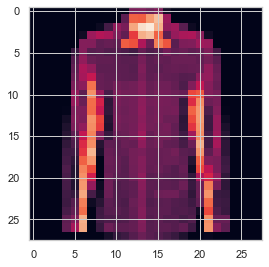

In [152]:

# lets see what the images look like

image = train_data_1[90, :]

plt.imshow(image)
plt.show()

In [153]:
y_train[90]

1

In [154]:
x_train = x_train.astype(np.float64)
x_validate = x_validate.astype(np.float64)
test_data = test_data.astype(np.float64)

## SVM

In [155]:
from sklearn import svm

svc = svm.SVC(C = 50)
svc.fit(x_train, y_train)

SVC(C=50, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [156]:
y_pred_svm = svc.predict(x_validate)
y_pred_svm

array([1, 0, 2, ..., 4, 1, 1])

In [157]:
y_pred_svm_test = svc.predict(test_data)
y_pred_svm_test

array([3, 4, 1, ..., 2, 2, 2])

In [158]:
print(classification_report(y_validate, y_pred_svm))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2379
           1       0.87      0.86      0.86      2424
           2       0.83      0.82      0.82      2364
           3       0.84      0.84      0.84      2367
           4       0.92      0.91      0.92      2466

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000



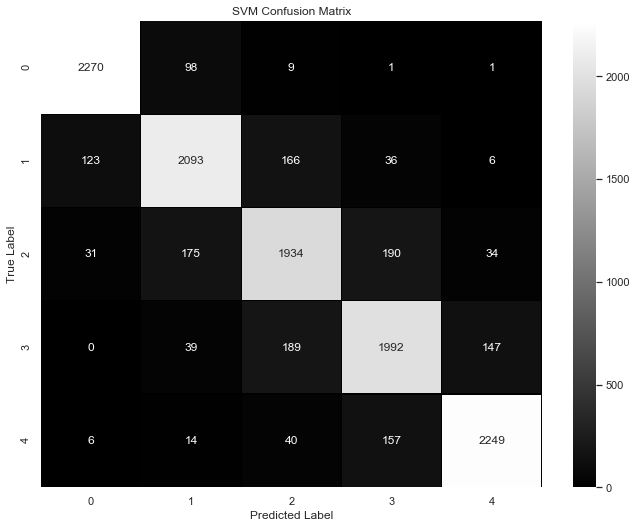

In [159]:
# Confusion matrix

confusion_mtx = confusion_matrix(y_validate, y_pred_svm) 

f,ax = plt.subplots(figsize = (10,8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("SVM Confusion Matrix")
plt.show()

<b>Implementing just SVM is giving 88 % accuracy , to improve the accuracy feature extraction methods with classical methods can be used.</b>

## PCA + classical methods

In [160]:
from sklearn.decomposition import PCA

pca = PCA(n_components=35)
X_train_reduced = pca.fit_transform(x_train)
pca.n_components_

35

In [161]:
np.sum(pca.explained_variance_ratio_)

0.8339159296396762

## Support Vector Machine (SVM)

In [162]:
from sklearn import svm
import timeit

start = timeit.default_timer()
svc_1 = svm.SVC(C = 80, probability=True)
svc_1.fit(X_train_reduced, y_train)

SVC(C=80, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [163]:
x_test = pca.transform(test_data)

In [164]:
X_validate_pca = pca.transform(x_validate)

In [165]:

y_pred_svm = svc_1.predict(X_validate_pca)
stop = timeit.default_timer()
print('Time to train SVM: ', stop - start)
print(y_pred_svm)

Time to train SVM:  761.7787402970062
[1 0 2 ... 4 1 1]


In [166]:
print(classification_report(y_validate, y_pred_svm))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2379
           1       0.87      0.88      0.88      2424
           2       0.85      0.84      0.84      2364
           3       0.86      0.86      0.86      2367
           4       0.93      0.92      0.93      2466

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000



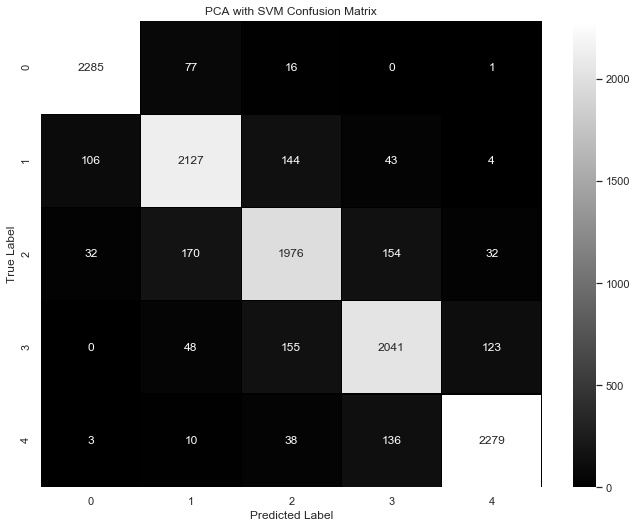

In [167]:
# Confusion matrix

confusion_mtx = confusion_matrix(y_validate, y_pred_svm) 

f,ax = plt.subplots(figsize = (10,8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("PCA with SVM Confusion Matrix")
plt.show()

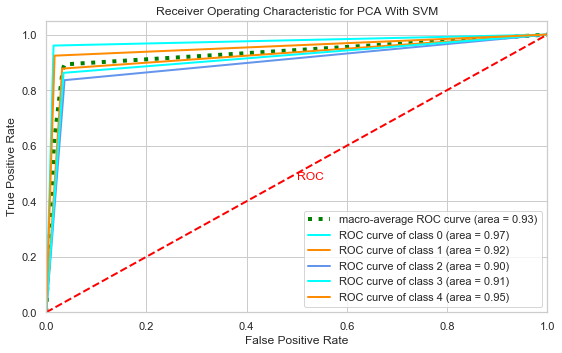

In [168]:
# ROC for SVM with PCA

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# y_predict_proba = svc_1.predict_proba(X_validate_pca)

n_classes=5

pred1=svc_1.predict(X_validate_pca)
t1=sum(X_validate_pca==0 for X_validate_pca in pred1-y_validate)/len(pred1)

### MACRO
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_validate))[:, i], np.array(pd.get_dummies(pred1))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('ROC',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for PCA With SVM')
plt.legend(loc="lower right")
plt.show()

## RandomizedSearch CV for SVM

In [169]:
from sklearn.model_selection import RandomizedSearchCV

parameters = [
              {'C': [1, 10,50, 100,125,150,175,200], 
               'kernel': ['rbf'], 
#                'gamma': [0.1, 0.2, 0.3]
              }
]
random_search = RandomizedSearchCV(estimator = svc_1,
                           param_distributions=parameters,
                          #  param_grid = parameters,
                          #  scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
start = timeit.default_timer()
random_search = random_search.fit(X_train_reduced, y_train)

In [170]:
random_search.best_params_

{'kernel': 'rbf', 'C': 50}

In [171]:
random_search.best_score_

0.8899791666666668

In [172]:
random_search.best_estimator_

SVC(C=50, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [174]:
final_model = random_search.best_estimator_



In [175]:
y_test_predict = final_model.predict(X_validate_pca)
stop = timeit.default_timer()
print('Time to train Random search with SVM: ', stop - start)

Time to train Random search with SVM:  6638.212405503


In [176]:
print(classification_report(y_validate, y_test_predict))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2379
           1       0.87      0.88      0.87      2424
           2       0.85      0.83      0.84      2364
           3       0.86      0.86      0.86      2367
           4       0.93      0.93      0.93      2466

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000



In [177]:
# predcting on test data
svm_test = final_model.predict(x_test)

In [178]:
svm_test

array([4, 4, 0, ..., 3, 2, 2])

In [180]:
predict_svm = pd.DataFrame(svm_test, columns=['Label'])
dataset_1 = [data_test['Id'],predict_svm]
final_df_1 = pd.concat(dataset_1,axis=1)

print(final_df_1)


final_df_1.to_csv('hp.csv',index=False, header=True)

        Id  Label
0        0      4
1        1      4
2        2      0
3        3      1
4        4      2
...    ...    ...
9995  9995      3
9996  9996      1
9997  9997      3
9998  9998      2
9999  9999      2

[10000 rows x 2 columns]


In [181]:
final_df_1.head()

,Id,Label
0,0,4
1,1,4
2,2,0
3,3,1
4,4,2


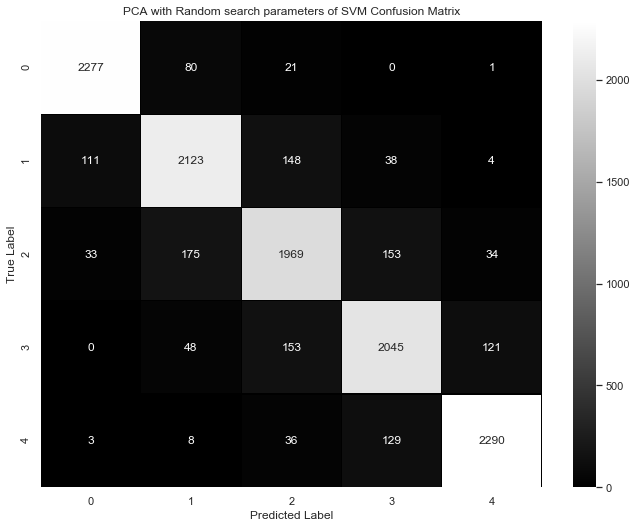

In [182]:
# Confusion matrix

confusion_mtx = confusion_matrix(y_validate, y_test_predict) 

f,ax = plt.subplots(figsize = (10,8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("PCA with Random search parameters of SVM Confusion Matrix")
plt.show()

## Random Forest Classifier

In [183]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=50, max_depth=50, random_state=42)
start = timeit.default_timer()
rf.fit(X_train_reduced, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [184]:
y_pred_rf = rf.predict(X_validate_pca)
stop = timeit.default_timer()
print('Time to train Random Forest: ', stop - start)

Time to train Random Forest:  13.695834684003785


In [185]:
print(classification_report(y_validate, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2379
           1       0.85      0.86      0.86      2424
           2       0.80      0.81      0.80      2364
           3       0.83      0.84      0.84      2367
           4       0.92      0.90      0.91      2466

    accuracy                           0.87     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.87      0.87      0.87     12000



In [186]:
rf_clf = RandomForestClassifier(random_state=42)

## RandomizedSearchCV Random Forest

In [187]:
parameters = [
              {'n_estimators': [20, 50, 80,100], 
               'max_depth': [10, 20, 30, 40, 50],
              }
]
random_search = RandomizedSearchCV(estimator = rf_clf,
                           param_distributions=parameters,
                           cv = 10,
                           n_jobs = -1)

start = timeit.default_timer()

random_search = random_search.fit(X_train_reduced, y_train)

In [188]:
random_search.best_params_

{'n_estimators': 80, 'max_depth': 30}

In [189]:
random_search.best_score_

0.8684791666666667

In [190]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [191]:
final_model_rf_clf = random_search.best_estimator_

In [192]:
y_test_predict_rf = final_model_rf_clf.predict(X_validate_pca)
stop = timeit.default_timer()
print('Time to train Random search with Random Forest: ', stop - start)

Time to train Random search with Random Forest:  375.22004699799436


In [193]:
print(classification_report(y_validate, y_test_predict_rf))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2379
           1       0.85      0.86      0.86      2424
           2       0.81      0.82      0.81      2364
           3       0.84      0.85      0.84      2367
           4       0.91      0.90      0.91      2466

    accuracy                           0.87     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.87      0.87      0.87     12000



In [194]:
# predcting on test data
rf_test = final_model_rf_clf.predict(x_test)

In [195]:
rf_test

array([3, 4, 0, ..., 3, 2, 2])

In [199]:
predict_rf = pd.DataFrame(rf_test, columns=['Label'])
dataset_2 = [data_test['Id'],predict_rf]
final_df_2 = pd.concat(dataset_2,axis=1)

print(final_df_2)


final_df_2.to_csv('rf.csv',index=False, header=True)

        Id  Label
0        0      3
1        1      4
2        2      0
3        3      1
4        4      2
...    ...    ...
9995  9995      3
9996  9996      1
9997  9997      3
9998  9998      2
9999  9999      2

[10000 rows x 2 columns]


In [200]:
final_df_2.head()

,Id,Label
0,0,3
1,1,4
2,2,0
3,3,1
4,4,2


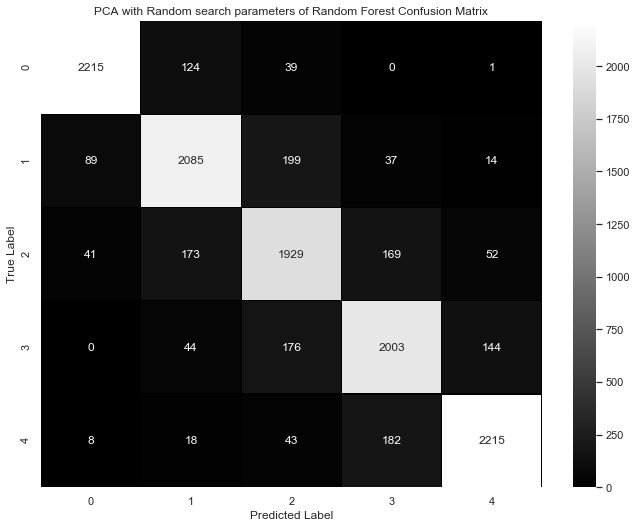

In [201]:
# Confusion matrix

confusion_mtx = confusion_matrix(y_validate, y_test_predict_rf) 

f,ax = plt.subplots(figsize = (10,8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("PCA with Random search parameters of Random Forest Confusion Matrix")
plt.show()

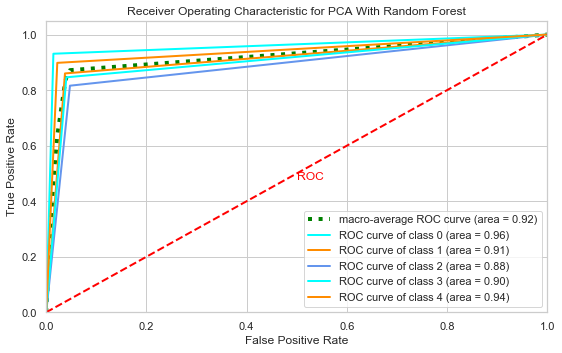

In [202]:
#ROC with PCA for Random Forest

n_classes=5

pred1=final_model_rf_clf.predict(X_validate_pca)
t1=sum(X_validate_pca==0 for X_validate_pca in pred1-y_validate)/len(pred1)

### MACRO
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_validate))[:, i], np.array(pd.get_dummies(pred1))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('ROC',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for PCA With Random Forest')
plt.legend(loc="lower right")
plt.show()

## Decision Tree Classifier

In [203]:
dt_clf = DecisionTreeClassifier(max_depth=50, random_state=42)
start = timeit.default_timer()

dt_clf.fit(X_train_reduced, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [204]:
y_pred_dt = dt_clf.predict(X_validate_pca)
stop = timeit.default_timer()
print('Time to train Decision Tree: ', stop - start)

Time to train Decision Tree:  3.5128332849999424


In [205]:
print(classification_report(y_validate, y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      2379
           1       0.79      0.76      0.78      2424
           2       0.70      0.71      0.70      2364
           3       0.76      0.75      0.76      2367
           4       0.86      0.87      0.86      2466

    accuracy                           0.80     12000
   macro avg       0.80      0.80      0.80     12000
weighted avg       0.80      0.80      0.80     12000



In [206]:
dt = DecisionTreeClassifier(random_state=42)

## RandomizedSearchCV Decision Tree

In [207]:
parameters = [
              { 
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
              }
]
random_search = RandomizedSearchCV(estimator = dt,
                           param_distributions=parameters,
                           cv = 10,
                           n_jobs = -1)
start = timeit.default_timer()
random_search = random_search.fit(X_train_reduced, y_train)

In [208]:
random_search.best_params_

{'max_depth': 20}

In [209]:
random_search.best_score_

0.807

In [210]:
random_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [211]:
final_model_dt_clf = random_search.best_estimator_

In [212]:
y_test_predict_dt = final_model_dt_clf.predict(X_validate_pca)
stop = timeit.default_timer()
print('Time to train Random search decision tree classifier: ', stop - start)

Time to train Random search decision tree classifier:  126.30288753000059


In [213]:
print(classification_report(y_validate, y_test_predict_dt))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2379
           1       0.78      0.79      0.79      2424
           2       0.72      0.71      0.71      2364
           3       0.77      0.76      0.77      2367
           4       0.87      0.87      0.87      2466

    accuracy                           0.81     12000
   macro avg       0.81      0.81      0.81     12000
weighted avg       0.81      0.81      0.81     12000



In [214]:
dt_test = final_model_dt_clf.predict(x_test)

In [215]:
dt_test

array([4, 4, 0, ..., 2, 2, 2])

In [216]:
predict_dt = pd.DataFrame(dt_test, columns=['Label'])
dataset_3 = [data_test['Id'],predict_dt]
final_df_3 = pd.concat(dataset_3,axis=1)

print(final_df_3)


final_df_3.to_csv('dt.csv',index=False, header=True)

        Id  Label
0        0      4
1        1      4
2        2      0
3        3      0
4        4      2
...    ...    ...
9995  9995      1
9996  9996      1
9997  9997      2
9998  9998      2
9999  9999      2

[10000 rows x 2 columns]


In [217]:
final_df_3.head()

,Id,Label
0,0,4
1,1,4
2,2,0
3,3,0
4,4,2


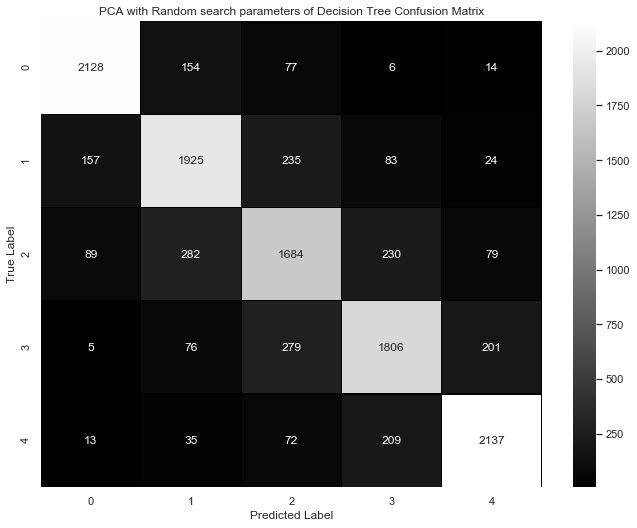

In [218]:
# Confusion matrix

confusion_mtx = confusion_matrix(y_validate, y_test_predict_dt) 

f,ax = plt.subplots(figsize = (10,8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("PCA with Random search parameters of Decision Tree Confusion Matrix")
plt.show()

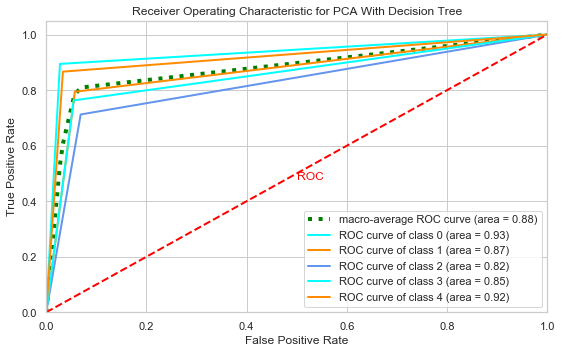

In [219]:
#ROC with PCA for Random Forest

n_classes=5

pred1=final_model_dt_clf.predict(X_validate_pca)
t1=sum(X_validate_pca==0 for X_validate_pca in pred1-y_validate)/len(pred1)

### MACRO
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_validate))[:, i], np.array(pd.get_dummies(pred1))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('ROC',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for PCA With Decision Tree')
plt.legend(loc="lower right")
plt.show()

## XGBoost Classifier

In [220]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=20, max_depth=10, random_state=42)
start = timeit.default_timer()
xgb.fit(X_train_reduced, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [221]:
y_pred_xgb = xgb.predict(X_validate_pca)
stop = timeit.default_timer()
print('Time to train XGBoost: ', stop - start)

Time to train XGBoost:  64.28067443799955


In [222]:
print(classification_report(y_validate, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2379
           1       0.86      0.86      0.86      2424
           2       0.81      0.81      0.81      2364
           3       0.85      0.84      0.85      2367
           4       0.92      0.91      0.91      2466

    accuracy                           0.87     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.87      0.87      0.87     12000



In [223]:
xgb_clf = XGBClassifier(random_state=42)

## RandomizedSearchCV XGBoost

In [224]:
parameters = [
              {'n_estimators': [20, 50, 80,100], 
               'max_depth': [10, 20, 30, 40, 50],
              }
]
random_search = RandomizedSearchCV(estimator = xgb_clf,
                           param_distributions=parameters,
                           cv = 10,
                           n_jobs = -1)

start = timeit.default_timer()

random_search = random_search.fit(X_train_reduced, y_train)

In [225]:
random_search.best_params_

{'n_estimators': 100, 'max_depth': 20}

In [226]:
random_search.best_score_

0.8872916666666667

In [227]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [228]:
final_model_xgb_clf = random_search.best_estimator_

In [229]:
y_test_predict_xgb = final_model_xgb_clf.predict(X_validate_pca)
stop = timeit.default_timer()
print('Time to train Random serach XG Boost: ', stop - start)

Time to train Random serach XG Boost:  4807.227152873995


In [230]:
print(classification_report(y_validate, y_test_predict_xgb))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2379
           1       0.88      0.88      0.88      2424
           2       0.84      0.84      0.84      2364
           3       0.87      0.86      0.86      2367
           4       0.93      0.92      0.92      2466

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000



In [232]:
xgb_test = final_model_xgb_clf.predict(x_test)

In [233]:
xgb_test

array([4, 4, 0, ..., 3, 2, 2])

In [234]:
predict_xgb = pd.DataFrame(xgb_test, columns=['Label'])
dataset_4 = [data_test['Id'],predict_xgb]
final_df_4 = pd.concat(dataset_4,axis=1)

print(final_df_4)


final_df_4.to_csv('xgb.csv',index=False, header=True)

        Id  Label
0        0      4
1        1      4
2        2      0
3        3      1
4        4      2
...    ...    ...
9995  9995      3
9996  9996      1
9997  9997      3
9998  9998      2
9999  9999      2

[10000 rows x 2 columns]


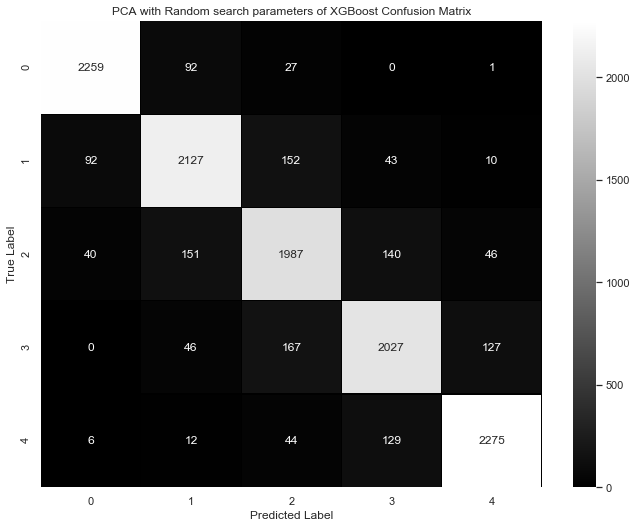

In [235]:
# Confusion matrix

confusion_mtx = confusion_matrix(y_validate, y_test_predict_xgb) 

f,ax = plt.subplots(figsize = (10,8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("PCA with Random search parameters of XGBoost Confusion Matrix")
plt.show()

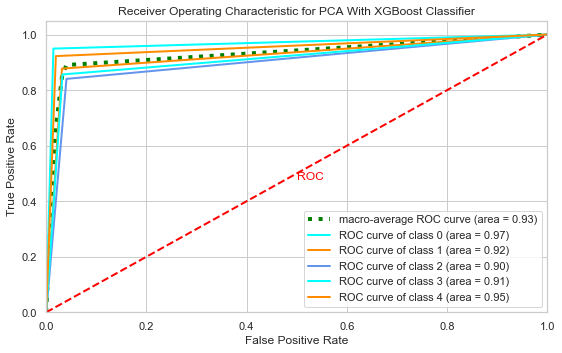

In [236]:
#ROC with PCA for XGBoost Classifier
n_classes=5

pred1=final_model_xgb_clf.predict(X_validate_pca)
t1=sum(X_validate_pca==0 for X_validate_pca in pred1-y_validate)/len(pred1)

### MACRO
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_validate))[:, i], np.array(pd.get_dummies(pred1))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('ROC',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for PCA With XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression

In [237]:

from sklearn.linear_model import LogisticRegression


log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
start = timeit.default_timer()

log_clf.fit(X_train_reduced, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [238]:

y_pred_log = log_clf.predict(X_validate_pca)
stop = timeit.default_timer()
print('Time to train Logistic Regression: ', stop - start)

Time to train Logistic Regression:  2.2191814690013416


In [239]:
print(classification_report(y_validate, y_pred_log))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77      2379
           1       0.51      0.52      0.51      2424
           2       0.48      0.45      0.47      2364
           3       0.60      0.66      0.63      2367
           4       0.74      0.71      0.72      2466

    accuracy                           0.62     12000
   macro avg       0.62      0.62      0.62     12000
weighted avg       0.62      0.62      0.62     12000



In [241]:
lr_test = log_clf.predict(x_test)

In [242]:
lr_test

array([3, 4, 0, ..., 4, 1, 3])

In [244]:
predict_lr = pd.DataFrame(lr_test, columns=['Label'])
dataset_5 = [data_test['Id'],predict_lr]
final_df_5 = pd.concat(dataset_5,axis=1)

print(final_df_5)


final_df_5.to_csv('lr.csv',index=False, header=True)

        Id  Label
0        0      3
1        1      4
2        2      0
3        3      1
4        4      1
...    ...    ...
9995  9995      3
9996  9996      1
9997  9997      4
9998  9998      1
9999  9999      3

[10000 rows x 2 columns]


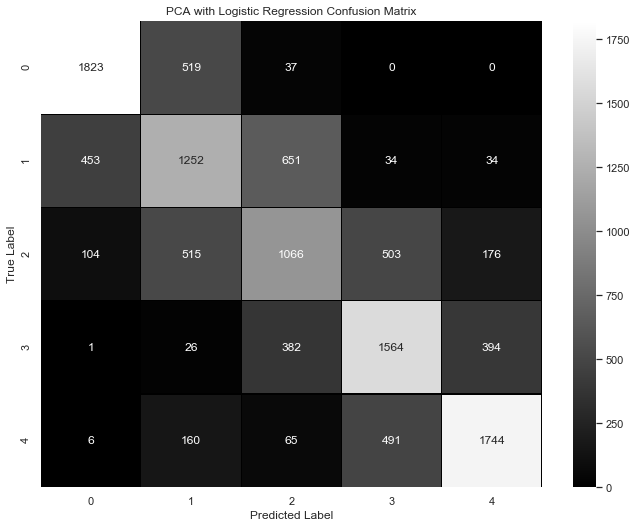

In [245]:
# Confusion matrix

confusion_mtx = confusion_matrix(y_validate, y_pred_log) 

f,ax = plt.subplots(figsize = (10,8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("PCA with Logistic Regression Confusion Matrix")
plt.show()

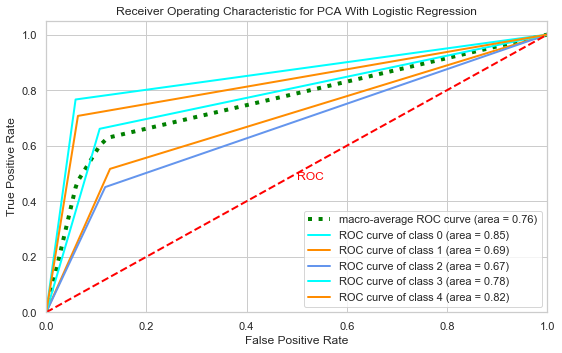

In [246]:
#ROC with PCA for XGBoost Classifier
n_classes=5

pred1=log_clf.predict(X_validate_pca)
t1=sum(X_validate_pca==0 for X_validate_pca in pred1-y_validate)/len(pred1)

### MACRO
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_validate))[:, i], np.array(pd.get_dummies(pred1))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('ROC',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for PCA With Logistic Regression')
plt.legend(loc="lower right")
plt.show()

## Voting Classifier with SVM and Random Forest

In [247]:
from sklearn.ensemble import VotingClassifier

svm_clf_ens =  svm.SVC(C = 50, probability=True, random_state=42)
rf_clf_ens = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('svm', svm_clf_ens), ('rf', rf_clf_ens)],
    voting='soft')
start = timeit.default_timer()

voting_clf.fit(X_train_reduced, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(C=50, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=True, random_state=42,
                                  shrinking=True, tol=0.001, verbose=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=50,
                                                     max_features='auto',
                                                     max_leaf_nodes=No

In [248]:
y_pred_voting_clf = voting_clf.predict(X_validate_pca)
stop = timeit.default_timer()
print('Time to train Voting Classifier: ', stop - start)

Time to train Voting Classifier:  664.2960940410048


In [249]:
print(classification_report(y_validate, y_pred_voting_clf))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2379
           1       0.88      0.88      0.88      2424
           2       0.85      0.84      0.85      2364
           3       0.87      0.87      0.87      2367
           4       0.93      0.93      0.93      2466

    accuracy                           0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.90      0.90      0.90     12000



In [251]:
voting_test = voting_clf.predict(x_test)

In [252]:
voting_test

array([3, 4, 0, ..., 2, 2, 2])

In [254]:
predict_vc = pd.DataFrame(voting_test, columns=['Label'])
dataset_6 = [data_test['Id'],predict_vc]
final_df_6 = pd.concat(dataset_6,axis=1)

print(final_df_6)


final_df_6.to_csv('vc.csv',index=False, header=True)

        Id  Label
0        0      3
1        1      4
2        2      0
3        3      1
4        4      2
...    ...    ...
9995  9995      3
9996  9996      1
9997  9997      2
9998  9998      2
9999  9999      2

[10000 rows x 2 columns]


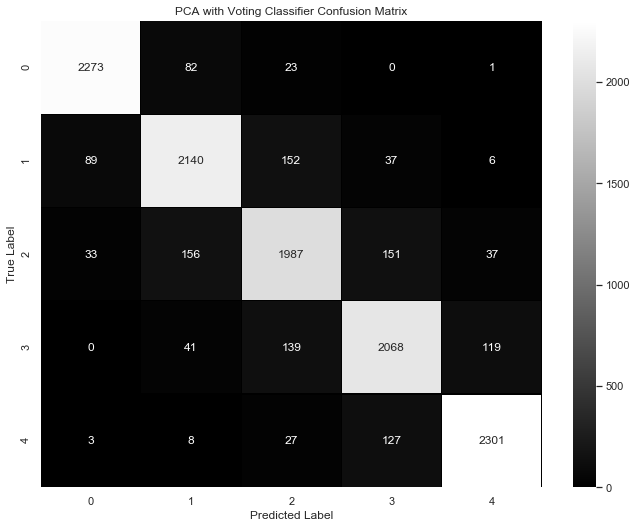

In [255]:
# Confusion matrix

confusion_mtx = confusion_matrix(y_validate, y_pred_voting_clf) 

f,ax = plt.subplots(figsize = (10,8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("PCA with Voting Classifier Confusion Matrix")
plt.show()

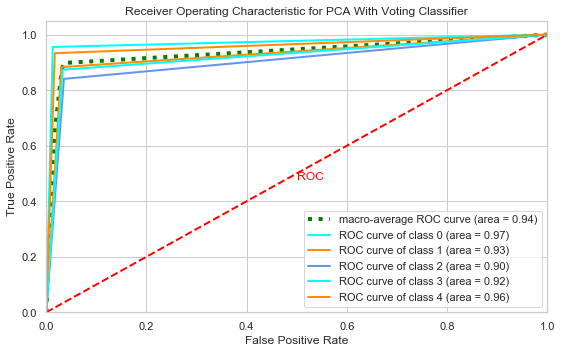

In [256]:
#ROC with PCA for Voting Classifier
n_classes=5

pred1=voting_clf.predict(X_validate_pca)
t1=sum(X_validate_pca==0 for X_validate_pca in pred1-y_validate)/len(pred1)

### MACRO
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_validate))[:, i], np.array(pd.get_dummies(pred1))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('ROC',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for PCA With Voting Classifier')
plt.legend(loc="lower right")
plt.show()

# TSNE + Classification Methods

In [257]:
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import TSNE

In [258]:
tsne = TSNE(n_components=2,random_state=42)
X_train_tsne = tsne.fit_transform(x_train)
tsne.n_components

2

In [259]:
X_validate_tsne = tsne.fit_transform(x_validate)

## SVM

In [260]:
start = timeit.default_timer()
svc_tsne = svm.SVC(C = 100, probability=True)
svc_tsne.fit(X_train_tsne, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [261]:
y_pred_svm_tsne = svc_tsne.predict(X_validate_tsne)
stop = timeit.default_timer()
print('Time to train SVM: ', stop - start)
print(y_pred_svm_tsne)

Time to train SVM:  285.3027926979994
[1 1 3 ... 0 4 1]


In [262]:
print(classification_report(y_validate, y_pred_svm_tsne))

              precision    recall  f1-score   support

           0       0.13      0.09      0.11      2379
           1       0.21      0.29      0.24      2424
           2       0.29      0.24      0.26      2364
           3       0.31      0.35      0.33      2367
           4       0.11      0.11      0.11      2466

    accuracy                           0.21     12000
   macro avg       0.21      0.22      0.21     12000
weighted avg       0.21      0.21      0.21     12000



In [263]:
x_test_tsne = tsne.fit_transform(test_data)

In [265]:
svm_tsne_test = svc_tsne.predict(x_test_tsne)

In [266]:
svm_tsne_test

array([0, 1, 1, ..., 3, 1, 0])

In [267]:
predict_svm_tsne = pd.DataFrame(svm_tsne_test, columns=['Label'])
dataset_7 = [data_test['Id'],predict_svm_tsne]
final_df_7 = pd.concat(dataset_7,axis=1)

print(final_df_7)


final_df_7.to_csv('tsne_svm.csv',index=False, header=True)

        Id  Label
0        0      0
1        1      1
2        2      1
3        3      1
4        4      3
...    ...    ...
9995  9995      0
9996  9996      4
9997  9997      3
9998  9998      1
9999  9999      0

[10000 rows x 2 columns]


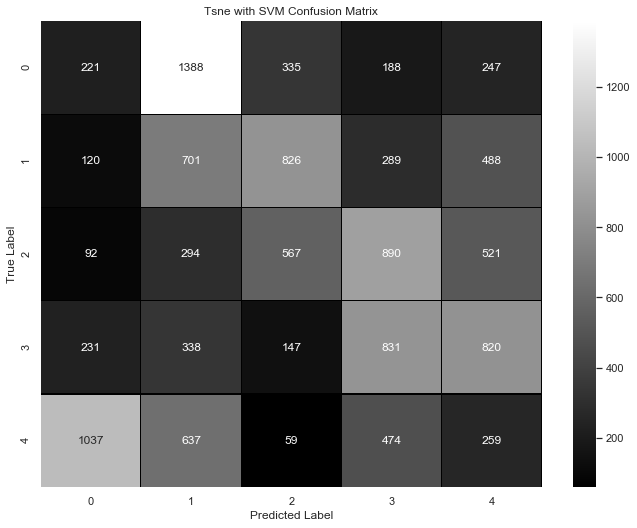

In [268]:
# Confusion matrix

confusion_mtx = confusion_matrix(y_validate, y_pred_svm_tsne) 

f,ax = plt.subplots(figsize = (10,8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Tsne with SVM Confusion Matrix")
plt.show()

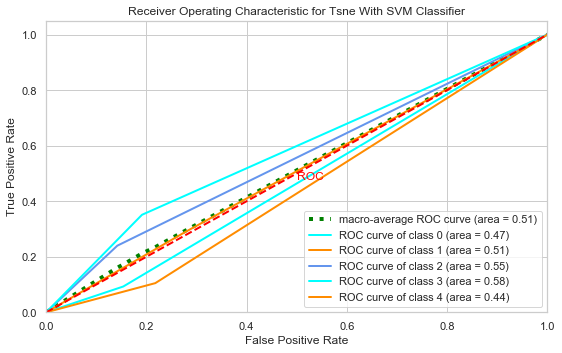

In [269]:
#ROC with Tsne for SVM Classifier
n_classes=5

pred1=svc_tsne.predict(X_validate_tsne)
t1=sum(X_validate_tsne==0 for X_validate_tsne in pred1-y_validate)/len(pred1)

### MACRO
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_validate))[:, i], np.array(pd.get_dummies(pred1))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('ROC',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Tsne With SVM Classifier')
plt.legend(loc="lower right")
plt.show()

## XGBoost Classifier

In [270]:
xgb_clf_tsne = XGBClassifier(n_estimators=20, max_depth=10, random_state=42)
xgb_clf_tsne.fit(X_train_tsne, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [271]:
y_pred_xgb_tsne = xgb_clf_tsne.predict(X_validate_tsne)

In [272]:
print(classification_report(y_validate, y_pred_xgb_tsne))

              precision    recall  f1-score   support

           0       0.28      0.28      0.28      2379
           1       0.37      0.29      0.32      2424
           2       0.21      0.26      0.23      2364
           3       0.31      0.33      0.32      2367
           4       0.13      0.12      0.13      2466

    accuracy                           0.25     12000
   macro avg       0.26      0.25      0.26     12000
weighted avg       0.26      0.25      0.25     12000



In [273]:
tsne_xgb_test = xgb_clf_tsne.predict(x_test_tsne)

In [274]:
tsne_xgb_test

array([0, 2, 1, ..., 3, 1, 0])

In [275]:
predict_xgb_tsne = pd.DataFrame(tsne_xgb_test, columns=['Label'])
dataset_8 = [data_test['Id'],predict_xgb_tsne]
final_df_8 = pd.concat(dataset_8,axis=1)

print(final_df_8)


final_df_8.to_csv('tsne_xgb.csv',index=False, header=True)

        Id  Label
0        0      0
1        1      2
2        2      1
3        3      1
4        4      2
...    ...    ...
9995  9995      0
9996  9996      4
9997  9997      3
9998  9998      1
9999  9999      0

[10000 rows x 2 columns]


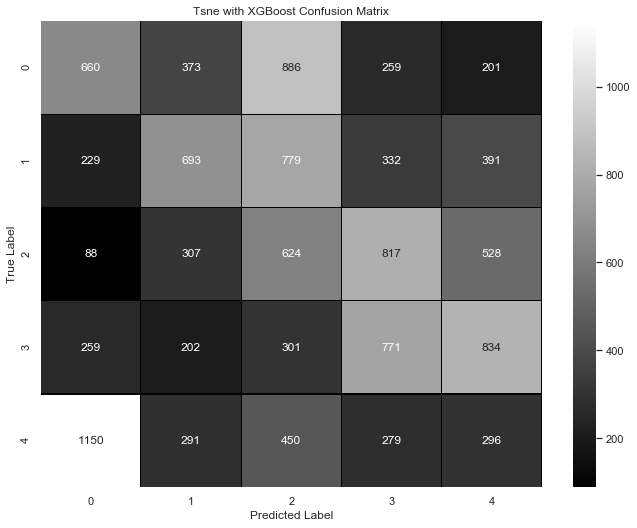

In [276]:
# Confusion matrix

confusion_mtx = confusion_matrix(y_validate, y_pred_xgb_tsne) 

f,ax = plt.subplots(figsize = (10,8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Tsne with XGBoost Confusion Matrix")
plt.show()

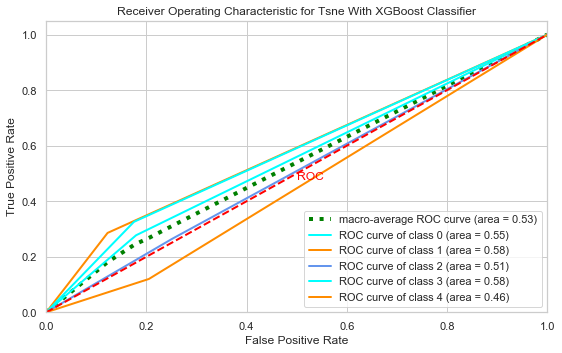

In [277]:
#ROC with Tsne for XGBoost Classifier
n_classes=5

pred1=xgb_clf_tsne.predict(X_validate_tsne)
t1=sum(X_validate_tsne==0 for X_validate_tsne in pred1-y_validate)/len(pred1)

### MACRO
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_validate))[:, i], np.array(pd.get_dummies(pred1))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('ROC',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Tsne With XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()

## Random Forest

In [278]:

rf_tsne = RandomForestClassifier(n_estimators=50, max_depth=50, random_state=42)
rf_tsne.fit(X_train_tsne, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [279]:
y_pred_rf_tsne = rf_tsne.predict(X_validate_tsne)

In [280]:
print(classification_report(y_validate, y_pred_rf_tsne))

              precision    recall  f1-score   support

           0       0.28      0.28      0.28      2379
           1       0.29      0.27      0.28      2424
           2       0.24      0.23      0.23      2364
           3       0.28      0.34      0.31      2367
           4       0.15      0.14      0.14      2466

    accuracy                           0.25     12000
   macro avg       0.25      0.25      0.25     12000
weighted avg       0.25      0.25      0.25     12000



In [281]:
tsne_rf_test = rf_tsne.predict(x_test_tsne)

In [282]:
tsne_rf_test

array([0, 2, 1, ..., 3, 1, 0])

In [283]:
predict_rf_tsne = pd.DataFrame(tsne_rf_test, columns=['Label'])
dataset_9 = [data_test['Id'],predict_rf_tsne]
final_df_9 = pd.concat(dataset_8,axis=1)

print(final_df_9)


final_df_9.to_csv('tsne_rf.csv',index=False, header=True)

        Id  Label
0        0      0
1        1      2
2        2      1
3        3      1
4        4      2
...    ...    ...
9995  9995      0
9996  9996      4
9997  9997      3
9998  9998      1
9999  9999      0

[10000 rows x 2 columns]


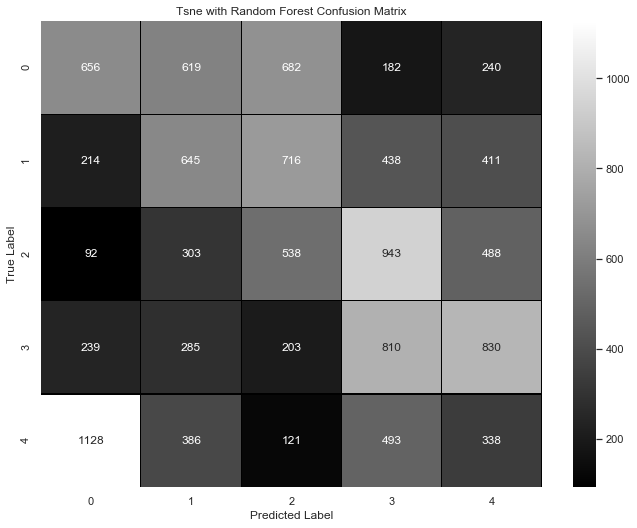

In [284]:
# Confusion matrix

confusion_mtx = confusion_matrix(y_validate, y_pred_rf_tsne) 

f,ax = plt.subplots(figsize = (10,8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Tsne with Random Forest Confusion Matrix")
plt.show()

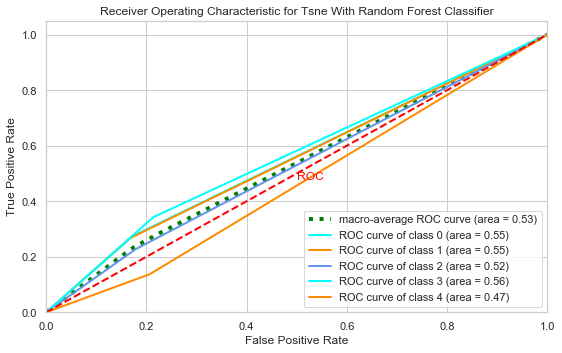

In [121]:
#ROC with Tsne for RandomForest Classifier
n_classes=5

pred1=rf_tsne.predict(X_validate_tsne)
t1=sum(X_validate_tsne==0 for X_validate_tsne in pred1-y_validate)/len(pred1)

### MACRO
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_validate))[:, i], np.array(pd.get_dummies(pred1))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('ROC',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Tsne With Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

## LDA + Classification Methods

In [289]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=4)
X_train_lda = lda.fit_transform(x_train,y_train)

In [291]:
X_validate_lda = lda.fit_transform(x_validate,y_validate)

In [292]:
start = timeit.default_timer()
svc_lda = svm.SVC(C = 100, probability=True)
svc_lda.fit(X_train_lda, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [293]:
y_pred_svm_lda = svc_lda.predict(X_validate_lda)

In [294]:
print(classification_report(y_validate, y_pred_svm_lda))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      2379
           1       0.67      0.72      0.69      2424
           2       0.64      0.62      0.63      2364
           3       0.73      0.70      0.72      2367
           4       0.85      0.85      0.85      2466

    accuracy                           0.75     12000
   macro avg       0.75      0.75      0.75     12000
weighted avg       0.75      0.75      0.75     12000



In [296]:
x_test_lda = lda.transform(test_data)

In [297]:
svm_lda_test = svc_lda.predict(x_test_lda)

In [298]:
svm_lda_test

array([3, 4, 0, ..., 2, 1, 3])

In [299]:
predict_svm_lda = pd.DataFrame(svm_lda_test, columns=['Label'])
dataset_10 = [data_test['Id'],predict_svm_lda]
final_df_10 = pd.concat(dataset_10,axis=1)

print(final_df_10)


final_df_10.to_csv('lda_svm.csv',index=False, header=True)

        Id  Label
0        0      3
1        1      4
2        2      0
3        3      1
4        4      1
...    ...    ...
9995  9995      1
9996  9996      1
9997  9997      2
9998  9998      1
9999  9999      3

[10000 rows x 2 columns]


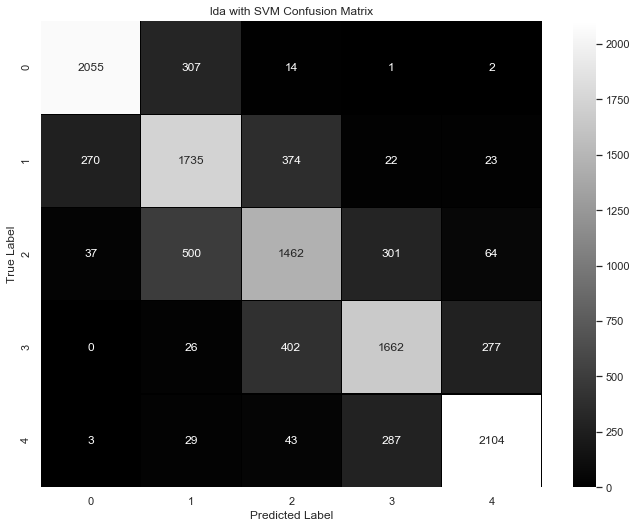

In [310]:
# Confusion matrix

confusion_mtx = confusion_matrix(y_validate, y_pred_svm_lda) 

f,ax = plt.subplots(figsize = (10,8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("lda with SVM Confusion Matrix")
plt.show()

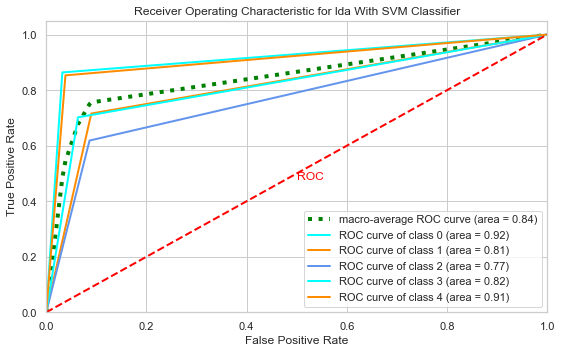

In [301]:
#ROC with lda for svm Classifier
n_classes=5

pred1=svc_lda.predict(X_validate_lda)
t1=sum(X_validate_tsne==0 for X_validate_lda in pred1-y_validate)/len(pred1)

### MACRO
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_validate))[:, i], np.array(pd.get_dummies(pred1))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('ROC',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for lda With SVM Classifier')
plt.legend(loc="lower right")
plt.show()

In [302]:
xgb_clf_lda = XGBClassifier(n_estimators=20, max_depth=10, random_state=42)
xgb_clf_lda.fit(X_train_lda, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [303]:
y_pred_xgb_lda = xgb_clf_lda.predict(X_validate_lda)

In [304]:
print(classification_report(y_validate, y_pred_xgb_lda))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      2379
           1       0.66      0.68      0.67      2424
           2       0.63      0.62      0.62      2364
           3       0.72      0.70      0.71      2367
           4       0.85      0.84      0.85      2466

    accuracy                           0.74     12000
   macro avg       0.74      0.74      0.74     12000
weighted avg       0.74      0.74      0.74     12000



In [306]:
xgb_lda_test = xgb_clf_lda.predict(x_test_lda)

In [307]:
xgb_lda_test

array([3, 4, 0, ..., 2, 1, 3])

In [308]:
predict_xgb_lda = pd.DataFrame(xgb_lda_test, columns=['Label'])
dataset_11 = [data_test['Id'],predict_xgb_lda]
final_df_11 = pd.concat(dataset_11,axis=1)

print(final_df_11)


final_df_11.to_csv('lda_xgb.csv',index=False, header=True)

        Id  Label
0        0      3
1        1      4
2        2      0
3        3      0
4        4      1
...    ...    ...
9995  9995      1
9996  9996      0
9997  9997      2
9998  9998      1
9999  9999      3

[10000 rows x 2 columns]


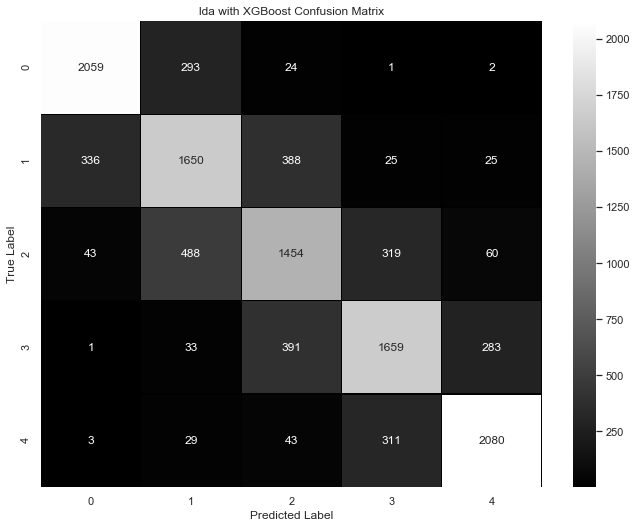

In [311]:
# Confusion matrix

confusion_mtx = confusion_matrix(y_validate, y_pred_xgb_lda) 

f,ax = plt.subplots(figsize = (10,8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("lda with XGBoost Confusion Matrix")
plt.show()

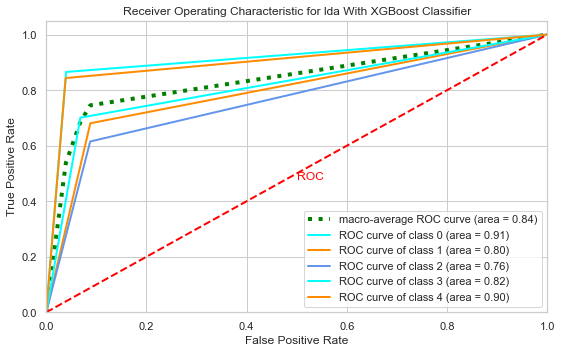

In [312]:
#ROC with lda for XGBoost Classifier
n_classes=5

pred1=xgb_clf_lda.predict(X_validate_lda)
t1=sum(X_validate_tsne==0 for X_validate_lda in pred1-y_validate)/len(pred1)

### MACRO
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_validate))[:, i], np.array(pd.get_dummies(pred1))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('ROC',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for lda With XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()

In [313]:

rf_lda = RandomForestClassifier(n_estimators=50, max_depth=50, random_state=42)
rf_lda.fit(X_train_lda, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [314]:
y_pred_rf_lda = rf_lda.predict(X_validate_lda)

In [315]:
print(classification_report(y_validate, y_pred_rf_lda))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      2379
           1       0.64      0.66      0.65      2424
           2       0.60      0.60      0.60      2364
           3       0.70      0.68      0.69      2367
           4       0.85      0.84      0.85      2466

    accuracy                           0.73     12000
   macro avg       0.73      0.73      0.73     12000
weighted avg       0.73      0.73      0.73     12000



In [316]:
rf_lda_test = rf_lda.predict(x_test_lda)

In [317]:
rf_lda_test

array([3, 4, 0, ..., 3, 1, 3])

In [318]:
predict_rf_lda = pd.DataFrame(rf_lda_test, columns=['Label'])
dataset_12 = [data_test['Id'],predict_rf_lda]
final_df_12 = pd.concat(dataset_12,axis=1)

print(final_df_12)


final_df_12.to_csv('lda_rf.csv',index=False, header=True)

        Id  Label
0        0      3
1        1      4
2        2      0
3        3      0
4        4      2
...    ...    ...
9995  9995      1
9996  9996      0
9997  9997      3
9998  9998      1
9999  9999      3

[10000 rows x 2 columns]


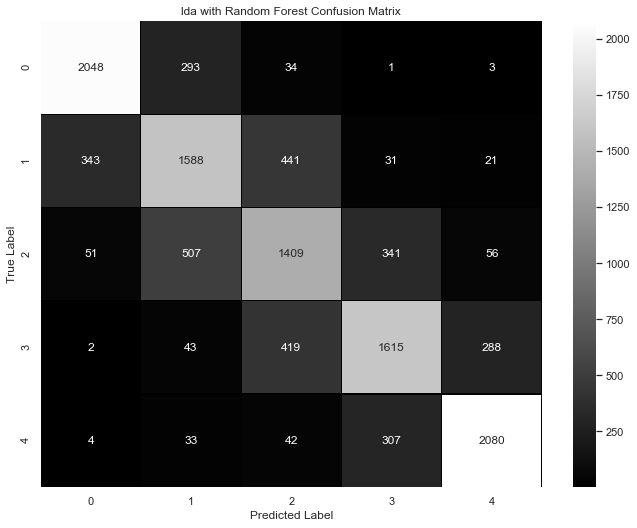

In [319]:
# Confusion matrix

confusion_mtx = confusion_matrix(y_validate, y_pred_rf_lda) 

f,ax = plt.subplots(figsize = (10,8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("lda with Random Forest Confusion Matrix")
plt.show()

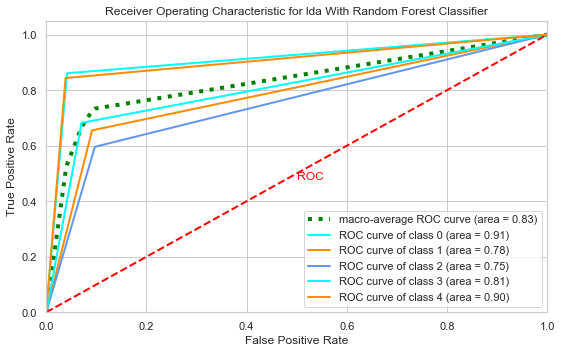

In [321]:
#ROC with lda for Random Forest Classifier
n_classes=5

pred1=rf_lda.predict(X_validate_lda)
t1=sum(X_validate_tsne==0 for X_validate_lda in pred1-y_validate)/len(pred1)

### MACRO
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_validate))[:, i], np.array(pd.get_dummies(pred1))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('ROC',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for lda With Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()